## Question 2


#### Part a

In [2]:
import numpy.random as nprand
import math as math
import numpy as np
import random as rnd
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.colors as clr

df = pd.read_csv('a1q2.csv', index_col=0)
df.describe()
x_values = df.iloc[:,[0]].as_matrix()
print(x_values)
y_values = df.iloc[:,[1]].as_matrix()
print(y_values)
L_values = df.iloc[:,[2]].as_matrix()
print(L_values)
#



[[-0.24444355]
 [-0.24034264]
 [-0.20721016]
 ..., 
 [-0.08057676]
 [-0.21814607]
 [-0.20674648]]
[[ 0.30110701]
 [ 0.31729832]
 [ 0.35334528]
 ..., 
 [ 0.04955019]
 [ 0.03694917]
 [-0.02434462]]
[[1]
 [1]
 [1]
 ..., 
 [5]
 [5]
 [5]]


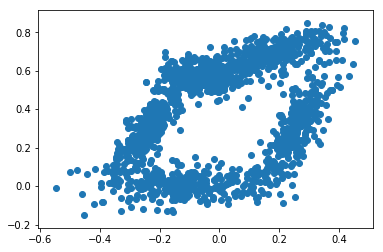

In [3]:
plt.scatter(x_values,y_values)
plt.show()
plt.savefig("A1Q2_1.png")

#### Part b

In [4]:
df.describe()

,x,y,L
count,1.500000e+03,1500.000000,1500.000000
mean,2.666693e-12,0.367169,3.000000
std,2.073927e-01,0.257422,1.414685
min,-5.453208e-01,-0.151810,1.000000
25%,-1.878923e-01,0.132955,2.000000
50%,-1.576575e-02,0.363876,3.000000
75%,1.946178e-01,0.601208,4.000000
max,4.546792e-01,0.848190,5.000000


In [5]:
df.cov()


,x,y,L
x,0.043012,0.022235,0.108327
y,0.022235,0.066266,-0.164084
L,0.108327,-0.164084,2.001334


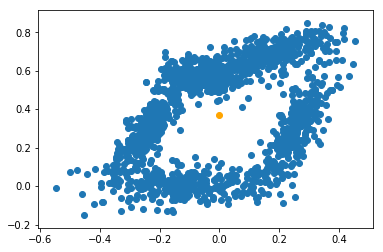

In [6]:
mean_color = ['orange']
plt.scatter(x_values,y_values)
plt.scatter(df['x'].mean(),df['y'].mean(),color=mean_color)
plt.show()
plt.savefig("A1Q2_2.png")

### Part C

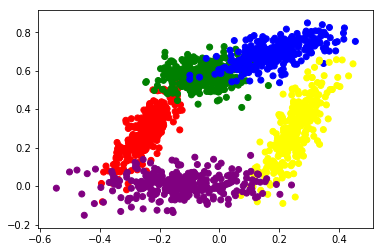

In [16]:
colors = ['red','green','blue','yellow','purple']
plt.scatter(x_values,y_values,c=L_values,cmap=clr.ListedColormap(colors))
#plt.scatter()
plt.show()
plt.savefig("A1Q2_3.png")

### Part D

In [8]:
df_by_L = df.groupby('L')
type(df_by_L)
df_by_L.describe()

x                                                              \
   count      mean       std       min       25%       50%       75%   
L                                                                      
1  300.0 -0.247398  0.052814 -0.394460 -0.280088 -0.244525 -0.213134   
2  300.0 -0.053646  0.072037 -0.246472 -0.098263 -0.054377 -0.004747   
3  300.0  0.178826  0.093011 -0.099082  0.121130  0.173035  0.227932   
4  300.0  0.251607  0.060299  0.071979  0.213716  0.249569  0.289911   
5  300.0 -0.129389  0.136635 -0.545321 -0.221522 -0.137058 -0.041885   

                 y                                                    \
        max  count      mean       std       min       25%       50%   
L                                                                      
1 -0.078915  300.0  0.277393  0.105949 -0.081600  0.206580  0.280085   
2  0.163805  300.0  0.572113  0.056396  0.408765  0.530927  0.569677   
3  0.454679  300.0  0.687624  0.059283  0.537343  0.652573  0.688411   
4  0.446867  300.0  0.290401  0.151516 -0.090237  0.198715  0.294266   
5  0.241201  300.0  0.008314  0.054370 -0.151810 -0.023420  0.011781   

                       
        75%       max  
L                      
1  0.343608  0.559495  
2  0.610438  0.725030  
3  0.725872  0.848190  
4  0.383939  0.657073  
5  0.041339  0.159467

In [9]:
df_by_L.cov()


x         y
L                      
1 x  0.002789  0.004392
  y  0.004392  0.011225
2 x  0.005189  0.000392
  y  0.000392  0.003180
3 x  0.008651  0.003376
  y  0.003376  0.003515
4 x  0.003636  0.007161
  y  0.007161  0.022957
5 x  0.018669  0.000195
  y  0.000195  0.002956

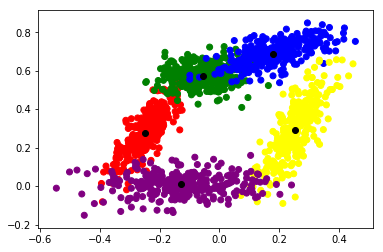

In [10]:

x_means = df_by_L['x'].mean()
y_means = df_by_L['y'].mean()
#mean_color = ['pink']
plt.scatter(x_values,y_values,c=L_values,cmap=clr.ListedColormap(colors))
plt.scatter(x_means,y_means,color='black')
plt.show()
plt.savefig("A1Q2_4.png")

#### Part e

In [14]:
clf = GaussianNB()

new_x_values = df.x.tolist()
new_y_values = df.y.tolist()
new_L_values = df.L.tolist()

#xy_values = df.iloc[:,[0,1]].as_matrix()
#print(xy_values)
xy_values = list(zip(new_x_values,new_y_values))
xytrain,xytest,goaltrain,goaltest = train_test_split(xy_values,new_L_values)
#print(xtrain)
#print(xtest)
#print(ytrain)
#print(ytest)
clf.fit(xytrain,goaltrain)
predicted_values = clf.predict(xytest)
matrix = confusion_matrix(goaltest,predicted_values)
print(matrix)

[[76  2  0  0  4]
 [ 2 69  2  0  0]
 [ 0  6 67  0  0]
 [ 0  0  5 64  4]
 [ 4  0  0  2 68]]
